#exercise from class

🚀 Challenge : Short-term Daily Precipitation Forecasting
Dataset Description:

Dataset Link: https://www.kaggle.com/muthuj7/weather-dataset
This dataset contains daily precipitation forecasts for multiple locations.
Data Exploration

1. Load the "Short-term Daily Precipitation Forecasting" dataset.

2. Explore the dataset and understand its structure.

Data Normalization

1. Perform Min-Max normalization on the precipitation values.

2. Create a new column, e.g., "Precipitation_normalized," to store the normalized values.

Data Reduction

1. Apply Principal Component Analysis (PCA) to reduce the dimensionality of the dataset.

2. Reduce the dataset to a 2D representation using PCA.

Data Aggregation

1. Group the data by location and calculate the average precipitation for each location.

2. Create a new dataset with the aggregated values.

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alexanderdawid","key":"2dd26e652c14b72f23669e095446a887"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d muthuj7/weather-dataset
!unzip weather-dataset.zip



Dataset URL: https://www.kaggle.com/datasets/muthuj7/weather-dataset
License(s): CC0-1.0
weather-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  weather-dataset.zip
  inflating: weatherHistory.csv      


Explore the dataset after loading

In [14]:
import pandas as pd

df = pd.read_csv('weatherHistory.csv')

df.head()




,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [12]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [10]:
# Check for missing values
print(df.isnull().sum())

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [18]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the Humidity column
df['Humidity_normalized'] = scaler.fit_transform(df[['Humidity']])

df.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Humidity_normalized
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,0.89
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,0.86
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,0.89
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,0.83
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,0.83


In [21]:
from sklearn.decomposition import PCA

# Selecting the features for PCA ( we filter only numeric columns)
features = df.select_dtypes(include=[float, int]).drop(columns=['Humidity_normalized'])

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
df_pca = pca.fit_transform(features)

# Convert the PCA result back into a DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# Display the PCA results
df_pca.head()


,PC1,PC2
0,-7.572204,-64.164119
1,-7.529264,-72.179519
2,-11.592634,-17.266138
3,-7.632113,-82.201402
4,-8.418255,-72.215926


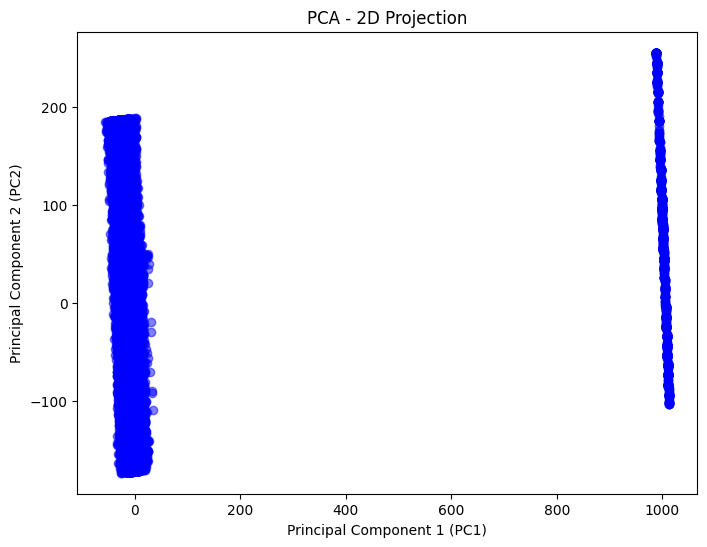

In [23]:
#another way to display
import matplotlib.pyplot as plt
# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c='blue', alpha=0.5)

# Add titles and labels
plt.title('PCA - 2D Projection')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')

# Show the plot
plt.show()


---------------------------------------------------

#For all of the below exercises, you will use the Titanic dataset, so load it beforehand on your notebook.

In [ ]:
!pip install Kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alexanderdawid","key":"2dd26e652c14b72f23669e095446a887"}'}

In [ ]:
#Move the kaggle.json file to the correct collab directory.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
#set permissions for Kaggle JSOn file
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle competitions download -c titanic
!unzip titanic.zip


  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 35.8MB/s]
Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd

# Load the Titanic dataset
titanic_data = pd.read_csv('train.csv')

# Explore the first few rows to ensure it's loaded correctly
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#🌟 Exercise 1: Duplicate Detection and Removal
Instructions
Objective: Identify and remove duplicate entries in the Titanic dataset.

Load the Titanic dataset.
Identify if there are any duplicate rows based on all columns.
Remove any duplicate rows found in the dataset.
Verify the removal of duplicates by checking the number of rows before and after the duplicate removal.
Hint: Use the duplicated() and drop_duplicates() functions in Pandas.

In [ ]:
# Check for duplicate rows
duplicate_rows = titanic_data.duplicated()

# Display the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")


Number of duplicate rows: 0


In [ ]:
# Remove duplicate rows
titanic_data_cleaned = titanic_data.drop_duplicates()

# Verify the removal of duplicates by checking the number of rows before and after the duplicate removal.
print(f"Number of rows before removing duplicates: {titanic_data.shape[0]}")
print(f"Number of rows after removing duplicates: {titanic_data_cleaned.shape[0]}")

Number of rows before removing duplicates: 891
Number of rows after removing duplicates: 891


#🌟 Exercise 2: Handling Missing Values
Instructions
Identify columns in the Titanic dataset with missing values.
Explore different strategies for handling missing data, such as removal, imputation, and filling with a constant value.
Apply each strategy to different columns based on the nature of the data.
Hint: Review methods like dropna(), fillna(), and SimpleImputer from scikit-learn.

In [ ]:
# Identify missing values in each column
# I am breaking this into many steps so I could see what is happening at every step
missing_data = titanic_data.isnull()
print(missing_data)



     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

In [ ]:
# Aggregating the Trues with SUM = number of missing values per column
missing_data = titanic_data.isnull().sum()
print(missing_data)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Display only the columns with number of missing values
print("Missing values in each column:")
print(missing_data[missing_data > 0])

Missing values in each column:
Age         177
Cabin       687
Embarked      2
dtype: int64


Now that we know which columns contain missing values, we can explore different strategies to handle them

In [ ]:
# Remove rows with missing values
titanic_data_no_missing_rows = titanic_data.dropna()

# Number of rows after removing missing values
final_row_count = titanic_data_no_missing_rows.shape[0]
print(f"Number of rows after removing missing values: {final_row_count}")


# the following code would remove all columns with 1 or more missing values
#titanic_data_no_missing_columns = titanic_data.dropna(axis=1)


Number of rows after removing missing values: 183


In [ ]:
# Fill missing values with the mean of the column (e.g., 'Age' column)
titanic_data_mean_imputed = titanic_data.copy()
titanic_data_mean_imputed['Age'] = titanic_data_mean_imputed['Age'].fillna(titanic_data_mean_imputed['Age'].mean())

# Fill missing values with the most frequent value - MODE (e.g., 'Embarked' column)
titanic_data_mode_imputed = titanic_data.copy()
titanic_data_mode_imputed['Embarked'] = titanic_data_mode_imputed['Embarked'].fillna(titanic_data_mode_imputed['Embarked'].mode()[0])

titanic_data_mode_imputed.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Fill missing values with a constant value (e.g., 'Cabin' column)
titanic_data_constant_imputed = titanic_data.copy()
titanic_data_constant_imputed['Cabin'] = titanic_data_constant_imputed['Cabin'].fillna('Unknown')


#🌟 Exercise 3: Feature Engineering
Instructions
Create new features, such as Family Size from SibSp and Parch, and Title extracted from the Name column.
Convert categorical variables into numerical form using techniques like one-hot encoding or label encoding.
Normalize or standardize numerical features if required.
Hint: Utilize Pandas for data manipulation and scikit-learn’s preprocessing module for encoding.



2.1. Creating Family Size feature

The Titanic dataset has two columns related to family:

SibSp: Number of siblings/spouses aboard the Titanic.
Parch: Number of parents/children aboard the Titanic.

We can create a new feature called Family Size by adding these two columns together and adding 1 (to account for the passenger themselves).

In [ ]:
# Create a new feature 'FamilySize'
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

# Display the first few rows to see the new feature
titanic_data[['SibSp', 'Parch', 'FamilySize']].head()


,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


In [ ]:
# Extract titles from the 'Name' column
titanic_data['Title'] = titanic_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Display the unique titles and the first few rows
titanic_data['Title'].unique()
titanic_data[['Name', 'Title']].head()

# split(','): Splits the name string at the comma, separating the last name from the rest.
# split('.')[0]: Splits the remaining string at the period to isolate the title (Mr.)
# strip(): Removes any leading or trailing whitespace.


,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encode the 'Embarked' feature
label_encoder = LabelEncoder()
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])

# Display the first few rows to see the encoded 'Embarked' column
print(titanic_data[['Embarked']].head())


   Embarked
0         2
1         0
2         2
3         2
4         2


 normalize the Age column to bring its values between 0 and 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the 'Age' feature
scaler = MinMaxScaler()
titanic_data['Age'] = scaler.fit_transform(titanic_data[['Age']])

# Display the first few rows to see the normalized 'Age' column
print(titanic_data[['Age']].head())


        Age
0  0.271174
1  0.472229
2  0.321438
3  0.434531
4  0.434531


#🌟 Exercise 5: Data Standardization and Normalization
Instructions
Assess the scale and distribution of numerical columns in the dataset.
Apply standardization to features with a wide range of values.
Normalize data that requires a bounded range, like [0, 1].
Hint: Consider using StandardScaler and MinMaxScaler from scikit-learn’s preprocessing module.

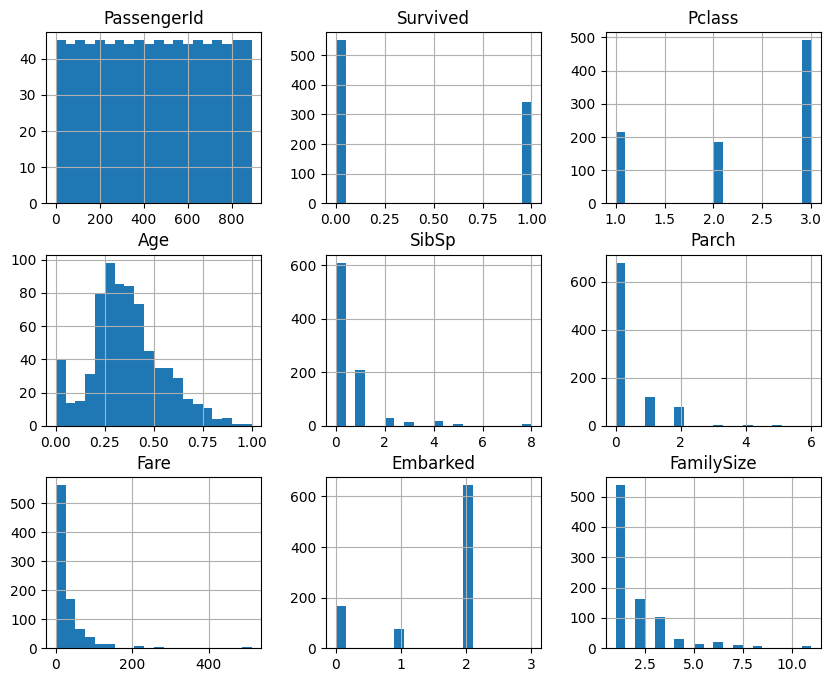

In [ ]:
# Display summary statistics for numerical columns
titanic_data.describe()

# Optionally, you can use histograms to visualize the distribution
import matplotlib.pyplot as plt

titanic_data.hist(bins=20, figsize=(10, 8))
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select columns to standardize
columns_to_standardize = ['Age', 'Fare']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to the selected columns
titanic_data[columns_to_standardize] = scaler.fit_transform(titanic_data[columns_to_standardize])

# Display the first few rows to see the standardized columns
titanic_data[columns_to_standardize].head()


,Age,Fare
0,-0.530377,-0.502445
1,0.571831,0.786845
2,-0.254825,-0.488854
3,0.365167,0.420730
4,0.365167,-0.486337


from matplotlib import pyplot as plt
_df_0['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Fare'].plot(kind='hist', bins=20, title='Fare')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Age', y='Fare', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Fare'].plot(kind='line', figsize=(8, 4), title='Fare')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Fare'].plot(kind='hist', bins=20, title='Fare')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='index', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Age', y='Fare', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Fare']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Fare')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_13['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Fare'].plot(kind='line', figsize=(8, 4), title='Fare')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Apply normalization to the 'FamilySize' column
titanic_data['FamilySize'] = min_max_scaler.fit_transform(titanic_data[['FamilySize']])

# Display the first few rows to see the normalized 'FamilySize' column
print(titanic_data[['FamilySize']].head())


   FamilySize
0         0.1
1         0.1
2         0.0
3         0.1
4         0.0


#🌟 Exercise 6: Feature Encoding
Instructions
Identify categorical columns in the Titanic dataset, such as Sex and Embarked.
Use one-hot encoding for nominal variables and label encoding for ordinal variables.
Integrate the encoded features back into the main dataset.
Hint: Utilize pandas.get_dummies() for one-hot encoding and LabelEncoder from scikit-learn for label encoding.

In [ ]:
import pandas as pd

# Load the Titanic dataset
titanic_data = pd.read_csv('train.csv')

# Display the first few rows to understand the data
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Identify categorical columns
categorical_columns = titanic_data.select_dtypes(include=['object']).columns

print("Categorical columns in the dataset:")
print(categorical_columns)


Categorical columns in the dataset:
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [ ]:
print(titanic_data.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
# Apply one-hot encoding to 'Sex' and 'Embarked' columns
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

# Display the first few rows to see the one-hot encoded columns
titanic_data.head()
#leads to error since it has been encoded already

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True


In [ ]:
# The tasks asks for label encoding for ordinal variables - but there are no
# ordinal variables in titanic dataset.

# The one-hot encoded and label encoded features are already integrated back
# into the main dataset since we applied the encoding directly on the
# titanic_data DataFrame.

#🌟 Exercise 7: Data Transformation for Age Feature
Instructions
Create age groups (bins) from the Age column to categorize passengers into different age categories.
Apply one-hot encoding to the age groups to convert them into binary features.
Hint: Use pd.cut() for binning the Age column and pd.get_dummies() for one-hot encoding.

In [ ]:
import pandas as pd
titanic_data = pd.read_csv('train.csv')


In [ ]:
# Create age bins
age_bins = [0, 12, 20, 40, 60, 80]
age_labels = ['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior']

# Create a new column 'AgeGroup' based on the bins
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Display the first few rows to see the new 'AgeGroup' column
titanic_data[['Age', 'AgeGroup']].head()


,Age,AgeGroup
0,22.0,Adult
1,38.0,Adult
2,26.0,Adult
3,35.0,Adult
4,35.0,Adult


In [ ]:
# Apply one-hot encoding to the 'AgeGroup' column
titanic_data = pd.get_dummies(titanic_data, columns=['AgeGroup'], drop_first=True)

# Display the first few rows to see the one-hot encoded age groups
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Middle-Aged,AgeGroup_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,True,False,False
